## Third/Final Release of Software

#### Yujeong Lee '21, Department of Computer Science, Earlham College

In [230]:
import os, sys
import pathlib
import re
import numpy as np
import re
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [233]:
def create_thresh(raw_scan, kernel_size, low_thresh): 
    grayscaled = cv2.cvtColor(raw_scan, cv2.COLOR_BGR2GRAY)
    blurred = cv2.medianBlur(grayscaled, kernel_size)
    _,thresh = cv2.threshold(blurred,int(low_thresh),255,cv2.THRESH_BINARY)
    thresh = cv2.medianBlur(thresh, kernel_size)
    blurred_thresh = cv2.medianBlur(thresh, kernel_size)
    return blurred_thresh

In [234]:
def apply_mask(raw_scan, mask): # mask is thresh
    new_im = cv2.bitwise_and(raw_scan,raw_scan,mask=mask)
    return new_im

In [235]:
def crop_params(thresh):
    top_found = False
    left_found = False
    NUM_PIXELS=100
    for i, horizontal_line in enumerate(thresh):
        # are there at least 50 white pixels in the row? Likely tablet
        if not top_found: 
            if (np.sum(horizontal_line) > 255*NUM_PIXELS): 
                top_edge = i
                top_found = True
        # are there less than 50 white pixels in the row? Likely noise 
        else: 
            if(np.sum(horizontal_line) < 255*NUM_PIXELS):
                bottom_edge = i
                break
    
    for i, vertical_line in enumerate(thresh.T):
        # are there at least 50 white pixels in the column? Likely tablet 
        if not left_found:
            if (np.sum(vertical_line) > 255*NUM_PIXELS):
                left_most_edge = i
                left_found = True
        # are there at least 50 white pixels in the column? Likely noise
        else:
            if(np.sum(vertical_line) < 255*NUM_PIXELS):
                right_most_edge = i
                break
                
    print (top_edge, bottom_edge, left_most_edge, right_most_edge)
    return top_edge, bottom_edge, left_most_edge, right_most_edge

In [237]:
def crop(mask_applied, thresh, padding):
    top, bottom, left, right = crop_params(thresh)
    cropped = mask_applied[top-padding:bottom+padding,left-padding:right+padding]
    
    return cropped

In [232]:
def read_raw(filename):
    raw_scan = mpimg.imread(filename) 
    return raw_scan

In [236]:
def draw_box(thresh, mask_applied):
    output = mask_applied.copy()
    top, bottom, left, right = crop_params(thresh)
    cv2.rectangle(output, (left,top), (right, bottom), (255,0,0), 50)
    return output

In [238]:
"""Calling functions just to draw the box"""
def call_draw_box_functions(filename, padding):
    raw_scan = read_raw(filename)
    thresh = create_thresh(raw_scan,19,40)
    mask_applied = apply_mask(raw_scan, thresh)
    boxed = draw_box(thresh, mask_applied)
    crop(mask_applied, thresh, padding)
    return boxed

5332 6314 4386 4814
4419 4883 255 1071
5777 6800 4444 4889
1217 1656 5972 6753
5536 6656 3544 4451
626 1756 710 1631
5592 6802 3533 4504
217 1300 209 604
152 598 5935 6772
5614 6828 3864 4787
136 557 5870 6737
238 1358 176 596
3846 5802 243 883
4312 4824 223 1119
4332 4901 220 1179
4804 6824 3282 4370
4599 6627 3677 4816
1190 1490 4220 4834
5840 6810 4456 4869
191 591 6046 6754
5803 5972 4486 4933
5738 6817 3902 4732
5699 6776 3799 4626
5439 6176 4444 4952
4502 4912 208 1125
272 1816 193 769
4798 6476 3160 4216
4448 4939 240 1231
341 1815 4201 4623
5076 6764 3337 4437
5224 6833 4512 4965
4610 6398 2920 3898
218 610 6022 6755
274 703 5932 6681
5099 6589 4413 4866
4707 6502 3409 4414


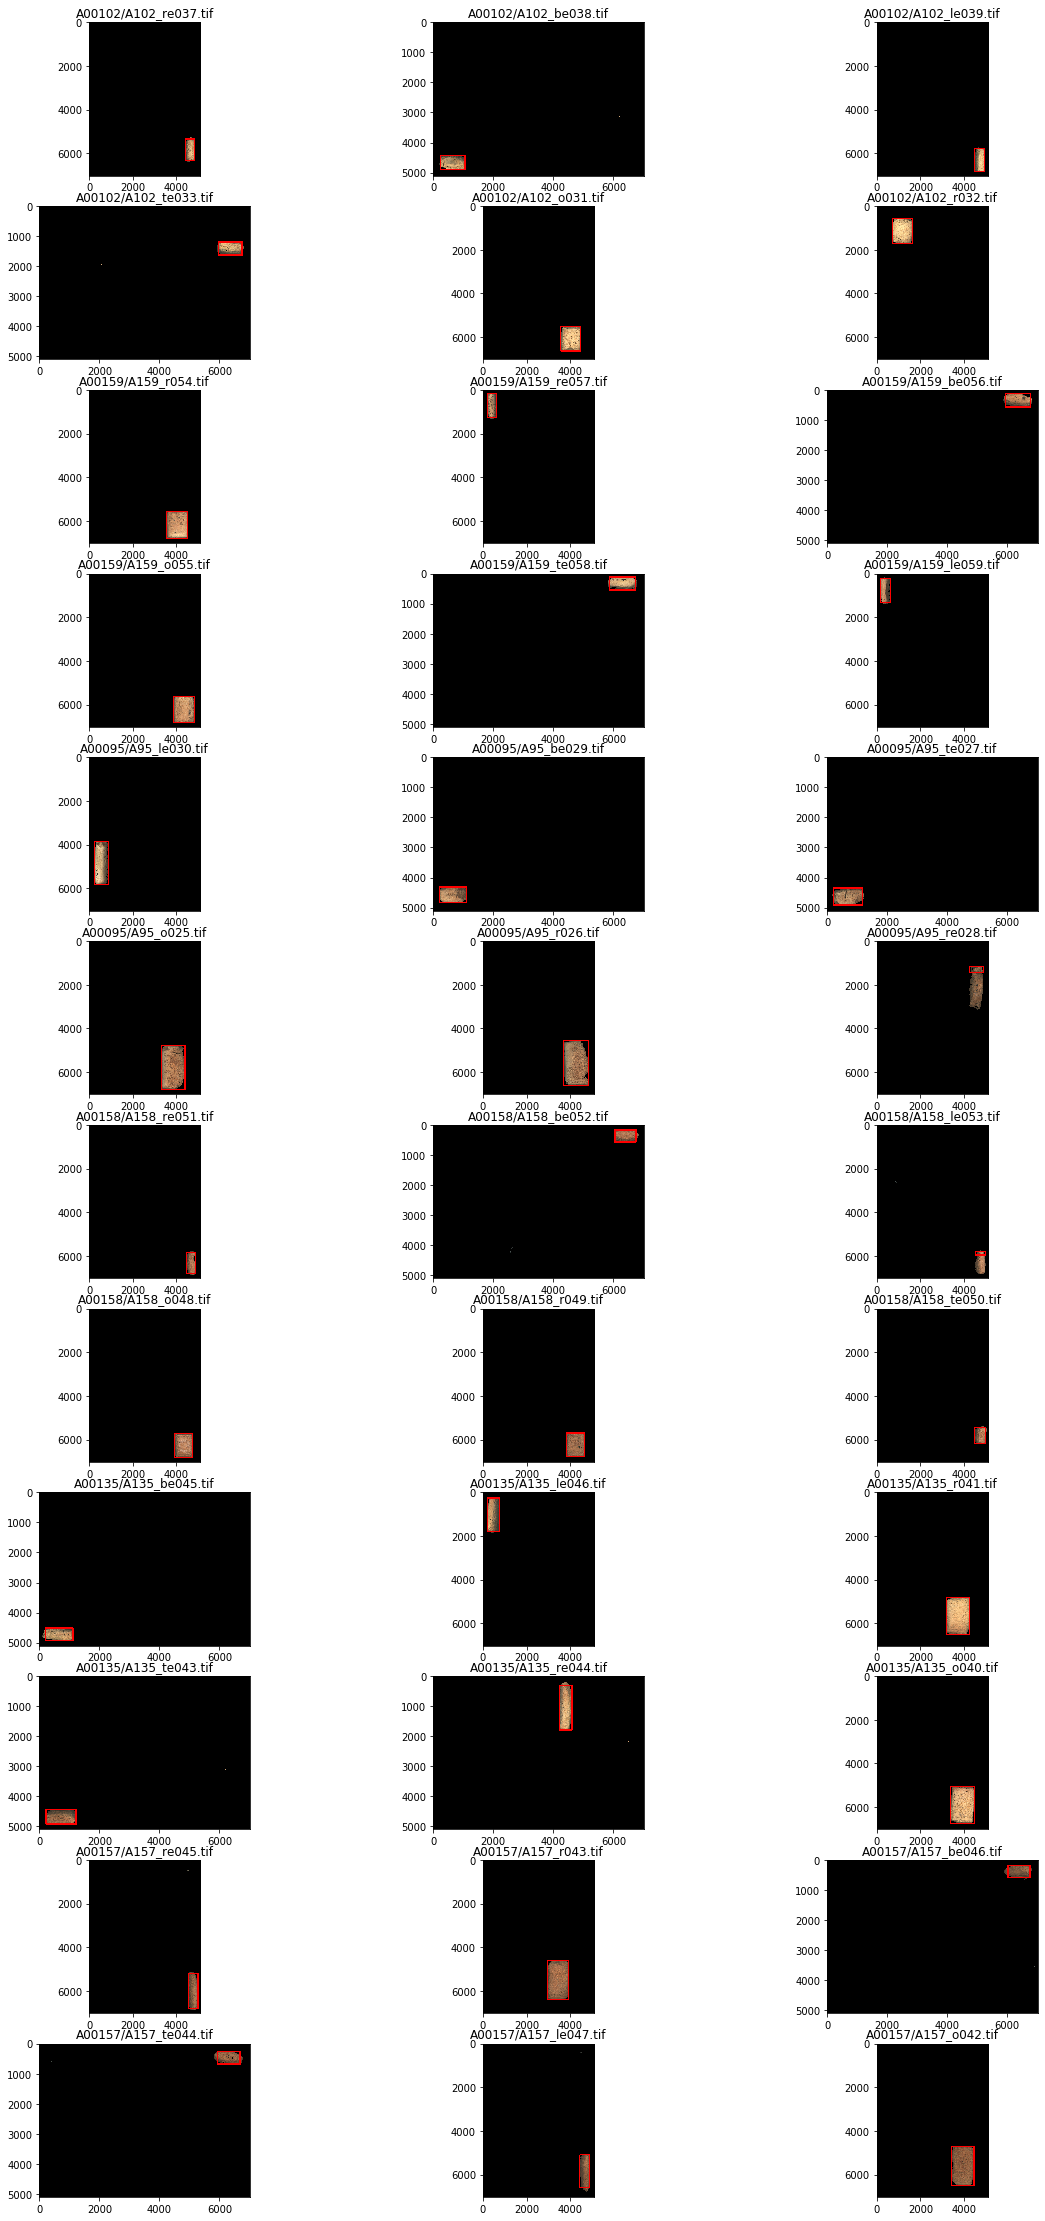

In [86]:
"""Display detected tablet fenced in red boxes from the smaller scan batch."""
def display_all_boxes(PATH): 
    # create a dictionary
    Collection = {} 
    for folder in os.listdir(PATH): 
        Collection[folder] = (os.listdir(PATH+"/"+folder))
    
    row, col = len(Collection)*2, 3
    fig = plt.figure(figsize=(20,40))
    i=1
    # retrieve each image
    for folder in Collection: 
        for image in Collection[folder]:
            filename = PATH+"/"+folder+"/"+image
            filetitle = folder+"/"+image
            img=call_draw_box_functions(filename, 200)
            fig.add_subplot(row,col,i)
            i+=1
            plt.imshow(img)
            plt.title(filetitle)
    fig.savefig('title-test.png')  


PATH = "/earlhamcs/eccs/users/elee17/Capstone/scan-batch-small"
display_all_boxes(PATH)

In [248]:
def produce_crop(raw_scan, padding):
    thresh = create_thresh(raw_scan,5,50)
    mask_applied = apply_mask(raw_scan, thresh)  
    cropped = crop(mask_applied, thresh, padding)
    return cropped

4007 4569 2493 4026
3956 5043 1583 2059
2078 3270 1772 3329
3948 5056 1531 2036
2371 3538 1555 3122
3991 4566 2512 4023


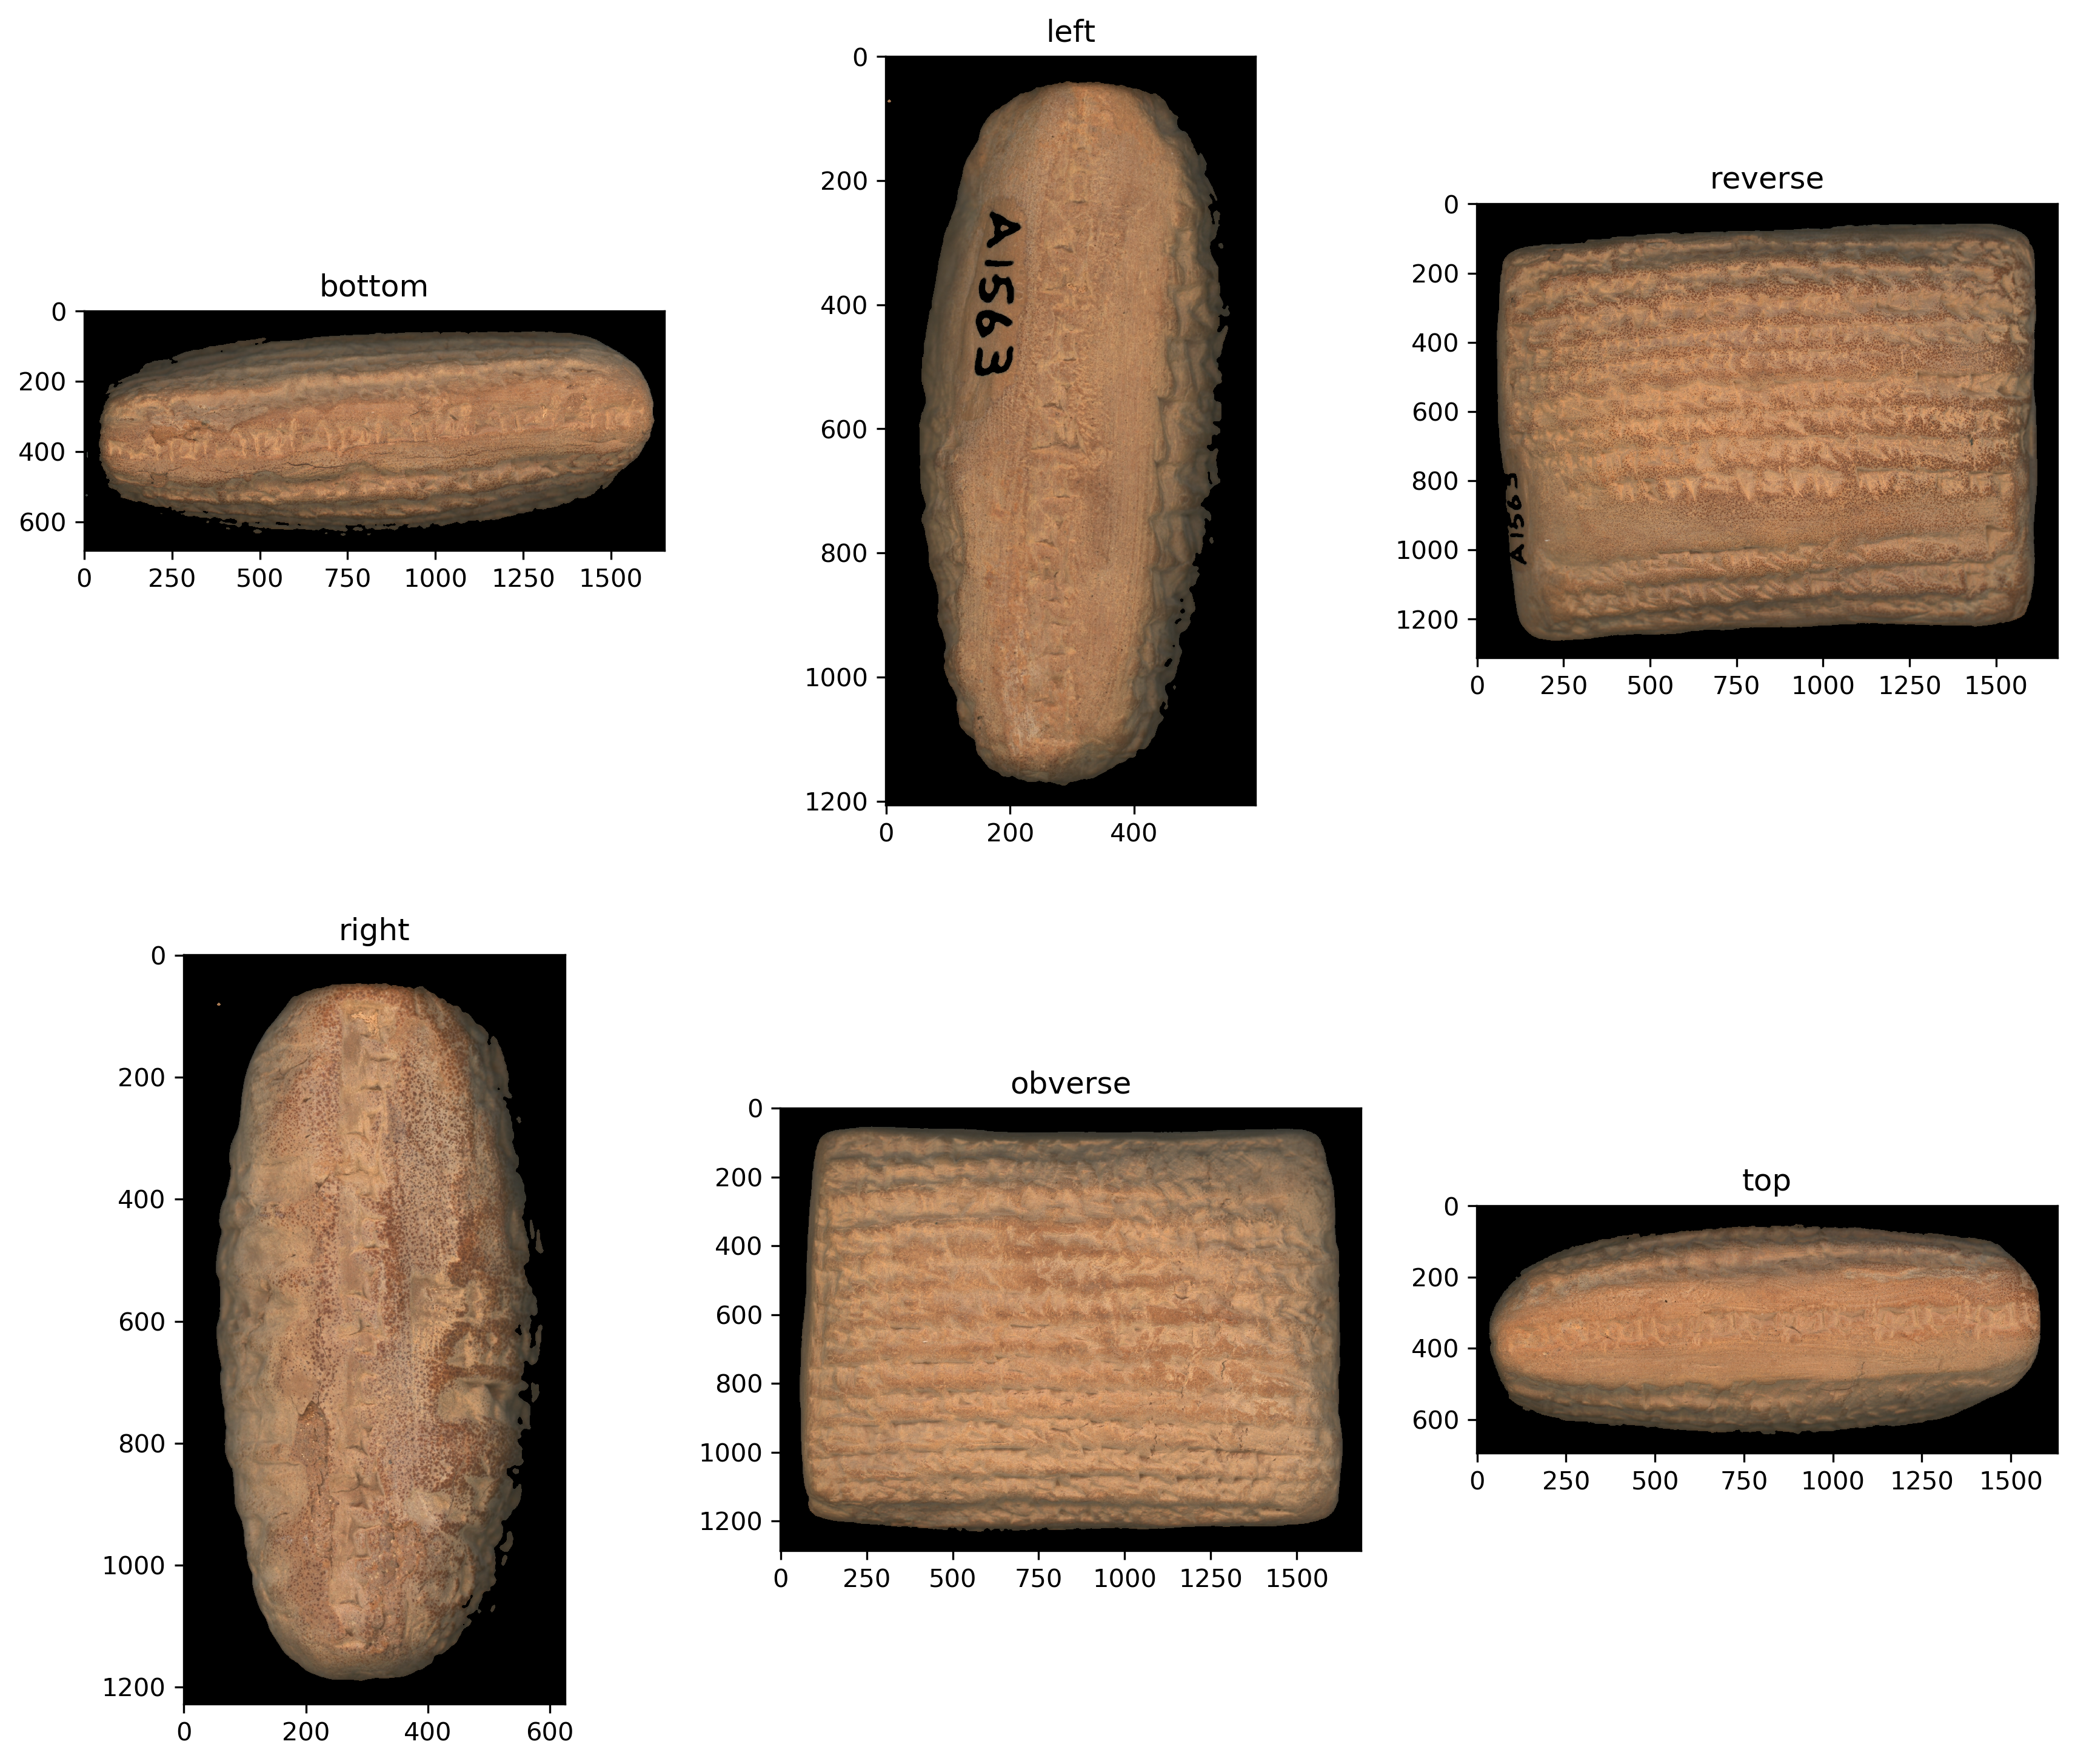

In [273]:
"""Display a set of six cropped images from one cuneiform tablet. Used for testing."""

PATH2 = "/earlhamcs/eccs/users/elee17/Capstone/scan-batch-large"
abbreviatios = {'r': 'reverse', 're':'right', 'le':'left', 'te':'top', 'be':'bottom','o':'obverse'}

def parse_name(filename):
    import re
    res = re.search(r'_.*?0', filename).group()
    return abbreviatios[res[1:-1]]

def display_cropped_six_image(ID):
    file_dir = PATH2 + '/'+ ID + '/'
    filenames = os.listdir(file_dir)
    
    r, c = 2, 3
    fig = plt.figure(figsize=(14,12), dpi=300)
    
    for i, file in enumerate(filenames, 1):
        raw_scan = mpimg.imread(file_dir+file)
        thresh = create_thresh(raw_scan, 5, 50)
        mask_applied = apply_mask(raw_scan, thresh)
        output = crop(mask_applied, thresh, 60)
        fig.add_subplot(r, c, i)
        plt.imshow(output)
        plt.title(parse_name(file))
    plt.show()
    fig.savefig(PATH+"/poster/"+ID+"-crop.png")   

display_cropped_six_image("A01563")

Image shape: (7019, 5100, 3)
5289 6341 4383 4817
Image shape: (5100, 7019, 3)
4416 4887 230 1101
Image shape: (7019, 5100, 3)
5753 6819 4441 4891
Image shape: (5100, 7019, 3)
1203 1660 5934 6783
Image shape: (7019, 5100, 3)
5533 6661 3540 4453
Image shape: (7019, 5100, 3)
623 1759 710 1634
Image shape: (7019, 5100, 3)
5591 6806 3532 4505
Image shape: (7019, 5100, 3)
193 1342 197 609
Image shape: (5100, 7019, 3)
148 606 5893 6803
Image shape: (7019, 5100, 3)
5613 6829 3863 4790
Image shape: (5100, 7019, 3)
135 577 5833 6770
Image shape: (7019, 5100, 3)
223 1395 175 600
Image shape: (7019, 5100, 3)
3837 5813 242 892
Image shape: (5100, 7019, 3)
4306 4827 209 1124
Image shape: (5100, 7019, 3)
4329 4904 212 1213
Image shape: (7019, 5100, 3)
4800 6836 3281 4376
Image shape: (7019, 5100, 3)
4592 6628 3673 4824
Image shape: (7019, 5100, 3)
1174 3067 4204 4838
Image shape: (7019, 5100, 3)
5816 6859 4454 4874
Image shape: (5100, 7019, 3)
185 598 6022 6801
Image shape: (7019, 5100, 3)
5778 6826 

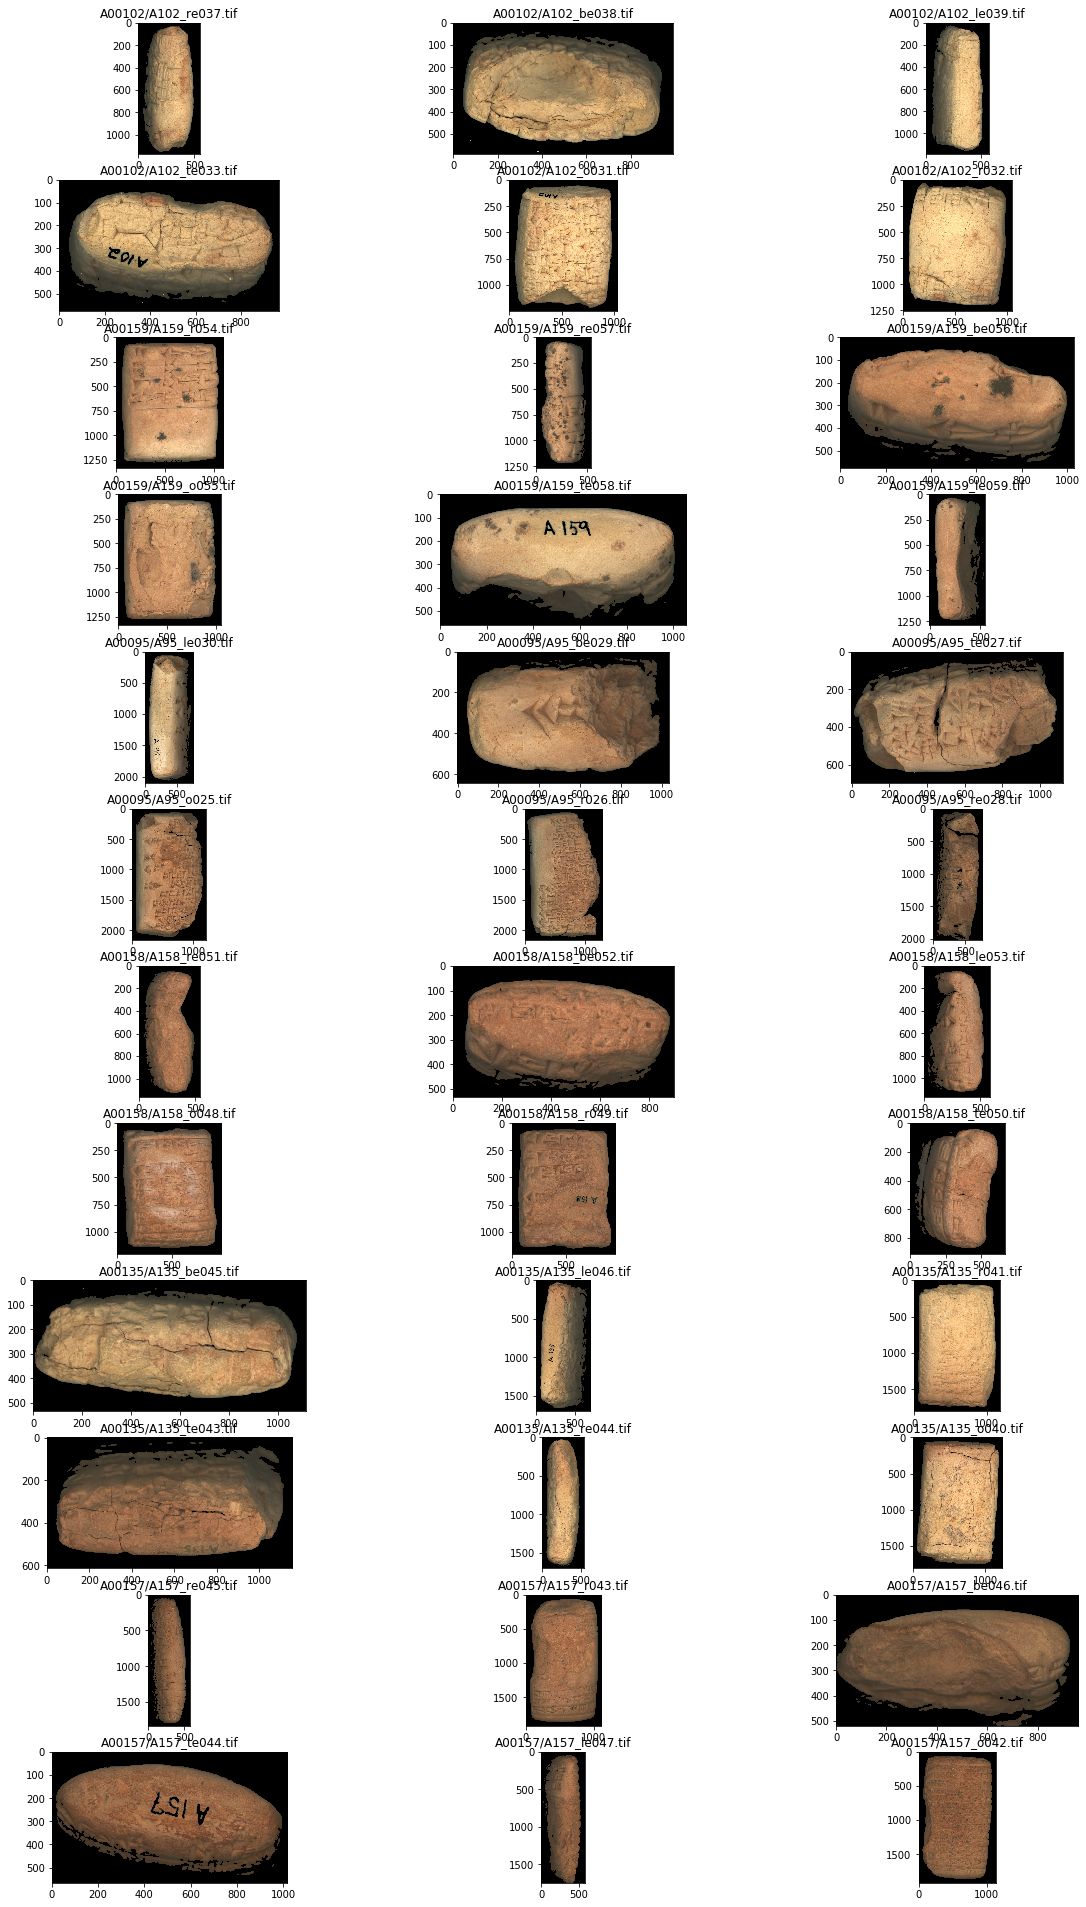

In [249]:
"""Display sets of cropped images from the entire small scan batch."""
def display_all_cropped(PATH): 
    # create a dictionary
    Collection = {} 
    for folder in os.listdir(PATH): 
        Collection[folder] = (os.listdir(PATH+"/"+folder))
    
    row, col = len(Collection)*2, 3
    fig = plt.figure(figsize=(20,40))
    i=1
    # retrieve each image
    for folder in Collection: 
        for image in Collection[folder]:
            filename = PATH+"/"+folder+"/"+image
            filetitle = folder+"/"+image
            img = mpimg.imread(filename)
            print("Image shape:", img.shape)
            img = produce_crop(img, 60)
            fig.add_subplot(row,col,i)
            i+=1
            plt.imshow(img)
            plt.title(filetitle)
    #plt.show()
    fig.savefig('aftercrop.png')  


PATH = "/earlhamcs/eccs/users/elee17/Capstone/scan-batch-small"
display_all_cropped(PATH)

In [263]:
"""Replaces abbreviations in the image filename, and displays titles on the subplot for readability.""" 
def replace_abbr(filename): 
    abbrs = {'r': 'reverse', 're':'right', 'le':'left', 'te':'top', 'be':'bottom','o':'obverse'}
    res = re.search(r'_.*?\d', filename).group()
    abbr = abbrs[res[1:-1]]
    return abbr

In [261]:
def put_on_canvas(tablet_dict):
    h, w = 6000, 3400 # initial canvas is big to accomodate scans of bigger tablets 
    background = np.zeros((h, w, 3), np.uint8) #4 channels
    
    vertical_center = w//2
    
    # place top scan on the canvas
    top_h, top_w, channels = tablet_dict['top'].shape
    top_w = 2*(top_w//2)
    background[:top_h, vertical_center-top_w//2:vertical_center+top_w//2, :3] = tablet_dict['top'][:,:top_w,:3]
    
    # place obverse scan on the canvas
    obverse_h, obverse_w, channels = tablet_dict['obverse'].shape
    obverse_w = 2*(obverse_w//2)
    background[top_h:top_h+obverse_h,vertical_center-obverse_w//2:vertical_center+obverse_w//2, :3] = tablet_dict['obverse'][:,:obverse_w,:3]
    
    # place bottom scan on the canvas
    bottom_h, bottom_w, channels = tablet_dict['bottom'].shape
    bottom_w = 2*(bottom_w//2)
    background[top_h+obverse_h:top_h+obverse_h+bottom_h,vertical_center-bottom_w//2:vertical_center+bottom_w//2, :3] = tablet_dict['bottom'][:,:bottom_w,:3]
    
    # place reverse scan on the canvas
    reverse_h, reverse_w, channels = tablet_dict['reverse'].shape
    reverse_w = 2*(reverse_w//2)
    background[top_h+obverse_h+bottom_h:top_h+obverse_h+bottom_h+reverse_h,vertical_center-reverse_w//2:vertical_center+reverse_w//2, :3] = tablet_dict['reverse'][:,:reverse_w,:3]
    horizontal_center = top_h + obverse_h//2

    # place left scan on the canvas
    left_h, left_w, channels = tablet_dict['left'].shape
    left_h = 2*(left_h//2)
    background[horizontal_center-left_h//2:horizontal_center+left_h//2, vertical_center-obverse_w//2-left_w:vertical_center-obverse_w//2, :3] = tablet_dict['left'][:left_h,:,:3]
    
    # place left scan on the canvas
    right_h, right_w, channels = tablet_dict['right'].shape
    right_h = 2*(right_h//2)
    background[horizontal_center-right_h//2:horizontal_center+right_h//2, vertical_center+obverse_w//2:vertical_center+obverse_w//2+right_w, :3] = tablet_dict['right'][:right_h,:,:3]
    
    return background

In [268]:
"""Build fatcross for one tablet. Used for testing and producing image for the poster."""
def build_flatcross(ID):
    file_dir = PATH + '/'+ ID + '/'
    filenames = os.listdir(file_dir)
    
    tablet_dict = {}
    for i, file in enumerate(filenames, 1):
        tablet_side = mpimg.imread(file_dir+file)
        abbr = replace_abbr(file)
        tablet_dict[abbr] = produce_crop(tablet_side, 60)
        print(abbr,"shape is ", tablet_dict[abbr].shape)
    final = put_on_canvas(tablet_dict)

    cv2.imwrite(PATH+"/poster/"+ID+".png", cv2.cvtColor(final, cv2.COLOR_RGB2BGR))
build_flatcross("A01563")

4007 4569 2493 4026
bottom shape is  (682, 1653, 3)
3956 5043 1583 2059
left shape is  (1207, 596, 3)
2078 3270 1772 3329
reverse shape is  (1312, 1677, 3)
3948 5056 1531 2036
right shape is  (1228, 625, 3)
2371 3538 1555 3122
obverse shape is  (1287, 1687, 3)
3991 4566 2512 4023
top shape is  (695, 1631, 3)


In [266]:
"""Finally, build fatcross for all images in the large scan batch."""

PATH = "/earlhamcs/eccs/users/elee17/Capstone/scan-batch-large"

def produce_flatcrosses():
    IDS = os.listdir(PATH)
    os.mkdir(PATH+"/output")
    
    for ID in IDS:
        try:
            build_flatcross(ID)
            print("Finished building fatcross for ID:", ID)
        except:
            print("There was some error with fatcross - it's probably a skinnycross with ID:", ID)  
        
produce_flatcrosses()
# build_flatcross(ID)

1213 2340 1099 2428
reverse shape is  (1247, 1449, 3)
3505 3879 2033 3295
bottom shape is  (494, 1382, 3)
2269 2276 2333 2701
right shape is  (127, 488, 3)
776 1859 1396 2707
obverse shape is  (1203, 1431, 3)
2102 2108 1130 1515
left shape is  (126, 505, 3)
3380 3814 1932 3193
top shape is  (554, 1381, 3)
/earlhamcs/eccs/users/elee17/Capstone/scan-batch-large/output/A00729.tif
Finished building fatcross for ID: A00729
2239 2951 4475 4912
right shape is  (832, 557, 3)
2281 2649 3585 4169
bottom shape is  (488, 704, 3)
3762 4481 2425 2789
right shape is  (839, 484, 3)
2238 2949 3193 3540
left shape is  (831, 467, 3)
3655 4368 3488 3896
right shape is  (833, 528, 3)
3738 4536 2339 3014
obverse shape is  (918, 795, 3)
1246 1624 3619 4238
top shape is  (498, 739, 3)
4198 4990 2379 3049
reverse shape is  (912, 790, 3)
/earlhamcs/eccs/users/elee17/Capstone/scan-batch-large/output/A00930.tif
Finished building fatcross for ID: A00930
4386 6341 1660 2330
left shape is  (2075, 790, 3)
2013 4537 1

### Results

* In the small scan batch, there were 6 tablets, all of which built successfully (100% success rate). 

* In the large scan batch, there were 173 tablets, 116 of which built successfully (67.05% success rate). Among the ones that failed to build, a notable portion of the tablets included more than 6 scans or had multiple scans for one side of the tablet. 

* Output images can be found in the Gitlab directory.

### Future Works

* Implement a function that ensures a folder only contains six images. 
* Improve the software to have a more robust performance in the face of different color, hue, and shadow level. 
* Potentially implement a graphic user interface to allow people from non-technical background to use the software. 